<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets_reddit.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets_reddit.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [2]:
import praw
import secrets_reddit as sr

# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(
    client_id= sr.REDDIT_API_CLIENT_ID,
    client_secret= sr.REDDIT_API_CLIENT_SECRET,
    user_agent= sr.REDDIT_API_USER_AGENT
)

In [5]:
print(reddit.read_only) 

True


<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected output you will see ar from `r/machinelearning` unless otherwise specified.

In [3]:
# YOUR CODE HERE
subreddit = reddit.subreddit("machinelearning")

What is the display name of the subreddit?

In [4]:
# YOUR CODE HERE
print(subreddit.display_name)

machinelearning


<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [5]:
# YOUR CODE HERE
print(subreddit.title)

Machine Learning


<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [6]:
# YOUR CODE HERE
print(subreddit.description)

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)
--------
***[@slashML on Twitter](https://twitter.com/slashML)***
--------
***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***
--------
**Beginners:**
--------
Please have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)

[Metacademy](http://www.metacademy.org) is a great resource which compiles le

<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [33]:
# try run this line, what do you see? press q once you are done
?subreddit.top 

In [7]:
# YOUR CODE HERE
for submission in subreddit.top(limit=10):
    print(submission.title)
    # Output: the submission's title
    #print(submission.score)
    # Output: the submission's score
    #print(submission.id)
    # Output: the submission's ID
    #print(submission.url)
    # Output: the URL the submission points to or the submission's URL if it's a self post

[Project] From books to presentations in 10s with AR + ML
[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
[R] First Order Motion Model applied to animate paintings
[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
[D] This AI reveals how much time politicians stare at their phone at work
[D] Types of Machine Learning Papers
[D] The machine learning community has a toxicity problem
I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P]
[Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
[P] Using oil portraits and First Order Model to bring the paintings back to life


<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [8]:
# YOUR CODE HERE
for submission in subreddit.top(time_filter="week",limit=10):
    print(submission.title)

[P][R] Modern Disney Diffusion, dreambooth model trained using the diffusers implementation
[P] Explain Paper - A Better Way to Read Academic Papers
[R] TOCH outperforms state of the art 3D hand-object interaction models and produces smooth interactions even before and after contact
[D] DALL·E to be made available as API, OpenAI to give users full ownership rights to generated images
[P] Made a text generation model to extend stable diffusion prompts with suitable style cues
[R] ERNIE-ViLG 2.0: Improving Text-to-Image Diffusion Model with Knowledge-Enhanced Mixture-of-Denoising-Experts + Gradio Demo
[News] The Stack: 3 TB of permissively licensed source code - Hugging Face and ServiceNow Research Denis Kocetkov et al 2022
[P] Learn diffusion models with Hugging Face course 🧨
[N] Adversarial Policies Beat Professional-Level Go AIs
[P] Fine Tuning Stable Diffusion: Naruto Character Edition


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?

Write a sample piece of code below extracting three additional pieces of information from the submission below.

In [9]:
# YOUR CODE HERE
for submission in subreddit.top(time_filter="week",limit=10):
    print("Title: ",submission.title)
    print("score: ",submission.score)
    print("First Comment: ",submission.comments[0].body[:80])
    print("Author: ",submission.author)
    print("---------------------------------------------------------------------------------------------")

Title:  [P][R] Modern Disney Diffusion, dreambooth model trained using the diffusers implementation
score:  1027
First Comment:  Lots of Frozen-Anna in Zelda.
Author:  Illustrious_Row_9971
---------------------------------------------------------------------------------------------
Title:  [P] Explain Paper - A Better Way to Read Academic Papers
score:  507
First Comment:  This is pretty good. Great Job!
Author:  xutw21
---------------------------------------------------------------------------------------------
Title:  [R] TOCH outperforms state of the art 3D hand-object interaction models and produces smooth interactions even before and after contact
score:  498
First Comment:  I read the left hand side one as Erogenous Input. Seemed about right.
Author:  SpatialComputing
---------------------------------------------------------------------------------------------
Title:  [D] DALL·E to be made available as API, OpenAI to give users full ownership rights to generated images
score:  40

💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data?

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 

In [10]:
%%time
from praw.models import MoreComments

# Create a list to store the top comments in
top_comments = []

# Getting the top 10 posts in the mentioned subreddit and iterating over it by a variable called submission
for submission in subreddit.top(limit=10):
    # Iterating over the comments in the "submission" post
    for top_level_comment in submission.comments:
        # If the extracted comment is of "MoreComments" type, ignore it and go to the next comment
        if isinstance(top_level_comment, MoreComments):
            continue
        # If the extracted comment is "Not" of "MoreComments" type, append it to the"top_comments" list
        top_comments.append(top_level_comment.body)

CPU times: user 418 ms, sys: 20.5 ms, total: 439 ms
Wall time: 50.6 s


#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [11]:
#YOUR CODE HERE  # the answer may vary 693 for r/machinelearning
print(len(top_comments))

746


In [12]:
import random

[random.choice(top_comments) for i in range(3)]

['This seems like the next museum gimmick where you have an AR app, you point it to a photo and you get the person telling you their life story',
 'Does it work with text as well?',
 'That is so dope']

<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data? 

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal?

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [13]:
# YOUR CODE HERE
from praw.models import MoreComments

# Instantiate the TSLA subreddit
subreddit_T = reddit.subreddit("TSLA")

# Create a list to store the TSLA top comments in
top_comments_tsla = []

# Getting the top 10 posts in the mentioned subreddit and iterating over it by a variable called submission for a one year period
for submission in subreddit_T.top(time_filter="year",limit=10):
    #print("Title: ",submission.title)
    # Iterating over the comments in the "submission" post
    for top_level_comment in submission.comments:
        # If the extracted comment is of "MoreComments" type, ignore it and go to the next comment
        if isinstance(top_level_comment, MoreComments):
            continue
        # If the extracted comment is "Not" of "MoreComments" type, append it to the"top_comments" list
        top_comments_tsla.append(top_level_comment.body)

In [14]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

122

In [15]:
[random.choice(top_comments_tsla) for i in range(10)]

['Get it!!',
 "You'll be able to buy more 550- 600 range",
 'Tried but didn’t realize it was after hours 🤦🏽\u200d♂️',
 'Welcome onboard 😀',
 'Tesla has scored the highest average ratings from all the brands on our list, with a 4.53 average rating. Tesla is an American automotive company specializing in the design and manufacture of electric vehicles and has skyrocketed in popularity over recent years.',
 '[This thread has some interesting discussion](https://www.reddit.com/r/teslainvestorsclub/comments/ra57aw/how_elon_musk_sold_10_million_tesla_shares_and/?utm_source=share&utm_medium=web2x&context=3) on this topic.',
 '[removed]',
 'Going to buy when it comes down below 300',
 'Sell high    manipulate market    buy low',
 'Congrats!!']

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [16]:
from transformers import pipeline# YOUR CODE HERE

#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [19]:
sentiment_model = pipeline("sentiment-analysis") 

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


#### 3. Get one comment from list `top_comments_tsla` from Task II - 5.

In [28]:
random.seed(10)
comment = random.choice(top_comments_tsla)

In [29]:
comment

'Bought 10 shares at $655!  It was a good time!'

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [30]:
sentiment = sentiment_model(comment)# YOUR CODE HERE 

What is the type of the output `sentiment`?

In [31]:
sentiment

[{'label': 'POSITIVE', 'score': 0.999847412109375}]

```
YOUR ANSWER HERE
```

In [32]:
print(f'The comment: {comment}')
print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

The comment: Bought 10 shares at $655!  It was a good time!
Predicted Label is POSITIVE and the score is 1.000


For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [7]:
%%writefile top_tlsa_comment_sentiment.py

import secrets_reddit as secrets
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=secrets.REDDIT_API_CLIENT_ID,        
        client_secret=secrets.REDDIT_API_CLIENT_SECRET,
        user_agent=secrets.REDDIT_API_USER_AGENT
        )
    
    subreddit = reddit.subreddit(display_name)# YOUR CODE HERE
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline("sentiment-analysis")# YOUR CODE HERE
    sentiment = sentiment_model(comment)
    return sentiment[0]


if __name__ == '__main__':
    tsub_red = input("Which Subreddit?")
    #print(tsub_red)
    subreddit = get_subreddit("TSLA")# YOUR CODE HERE
    comments = get_comments(subreddit)
    comment = comments[0]# YOUR CODE HERE
    sentiment = run_sentiment_analysis(comment)
    
    print("-----------------------------------------------------------------------------------------------------")
    print(f'The comment: {comment}')
    print("-----------------------------------------------------------------------------------------------------")
    print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Overwriting top_tlsa_comment_sentiment.py


Run the following block to see the output.

In [8]:
!python top_tlsa_comment_sentiment.py

Which Subreddit?^C
Traceback (most recent call last):
  File "top_tlsa_comment_sentiment.py", line 65, in <module>
    tsub_red = input("Which Subreddit?")
KeyboardInterrupt


<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

In [7]:
i=0
for submission in reddit.subreddit("TSLA").top(time_filter="day", limit=None):
    i+=1
print("Total (past day): ",i)
print("-----------------------------------------------------------------------------------------------------")
i=0
for submission in reddit.subreddit("TSLA").top(time_filter="week", limit=None):
    i+=1
print("Total (past week): ",i)
print("Average (past week): ",i/7)
print("-----------------------------------------------------------------------------------------------------")
i=0
for submission in reddit.subreddit("TSLA").top(time_filter="month", limit=None):
    i+=1
print("Total (past month): ",i)
print("Average (past month): ",i/30)
print("-----------------------------------------------------------------------------------------------------")
i=0
for submission in reddit.subreddit("TSLA").top(time_filter="year", limit=None):
    i+=1
print("Total (past year): ",i)
print("Average (past year): ",i/365)

Total (past day):  3
-----------------------------------------------------------------------------------------------------
Total (past week):  7
Average (past week):  1.0
-----------------------------------------------------------------------------------------------------
Total (past month):  45
Average (past month):  1.5
-----------------------------------------------------------------------------------------------------
Total (past year):  544
Average (past year):  1.4904109589041097


💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

Number of posters:  20
Number of posts:  45
Average number of posts per poster:  2.25
-----------------------------------------------------------------------------------------------------


<BarContainer object of 20 artists>

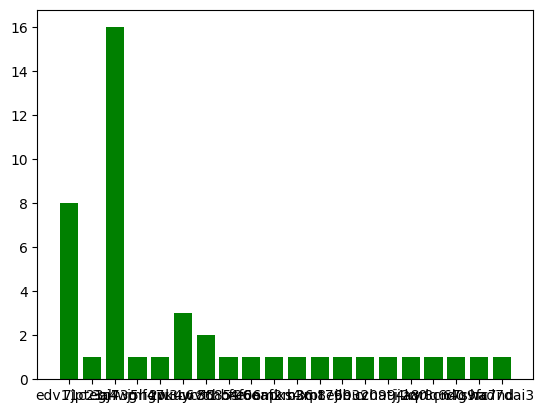

In [54]:
import matplotlib.pyplot as plt
from collections import Counter

redditor=[]
for submission in reddit.subreddit("TSLA").top(time_filter="month", limit=None):
    redditor.append(submission.author.id)
    
uniq = Counter(redditor)
print("Number of posters: ",len(uniq))
print("Number of posts: ",sum(uniq.values()))
print("Average number of posts per poster: ", sum(uniq.values())/len(uniq))
print("-----------------------------------------------------------------------------------------------------")
plt.bar(uniq.keys(), uniq.values(), color='g')